In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from math import *
from Y_views import *
%matplotlib inline

# Reading data

In [2]:
all_hits = pd.read_csv('Data/strawtubesPoint_decoded_hits.csv', delimiter=',')
all_hits['Index'] = all_hits.index
all_hits = all_hits[['Index', 'X', 'Y', 'Z', 'TrackID', 'Time', 'StatNb', 'ViewNb', 'PlaneNb', 'LayerNb', 'StrawNb', 'dist2Wire', 'event', 'k']]
all_hits.head()

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k
0,0,8.883409,-61.202305,-1974.859985,3,232.044861,5,0,0,0,319,0.274822,0,0
1,1,8.858191,-61.225544,-1973.742188,3,232.074081,5,0,0,1,320,0.582455,0,1
2,2,8.824563,-61.256523,-1972.251953,3,232.118286,5,0,1,0,319,0.111252,0,2
3,3,8.632817,-61.432972,-1963.756592,3,232.406479,5,1,0,1,320,0.164412,0,3
4,4,8.573978,-61.487133,-1961.149292,3,232.488541,5,1,1,1,320,0.226827,0,4


# Comparing result of algorithm and reality

In [3]:
#Тут смотрится только часть хитов до магнита и только в Y-views
event0 = all_hits[all_hits['event']==14]
event0 = modify_for_yz_analisys(event0)
set(event0['TrackID'])

/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


{2.0}

In [4]:
tracks, linking_table = loop_yz(event0, 7, 0.85)

In [5]:
trackIDs = set(event0.TrackID.values)
real_tracks = {}
for i in trackIDs:
    real_tracks[i] = np.polyfit(event0[event0['TrackID'] == i]['Z'].values,
                                event0[event0['TrackID'] == i]['Y'].values, 1)

number of recognised tracks: 1
number of real tracks: 1


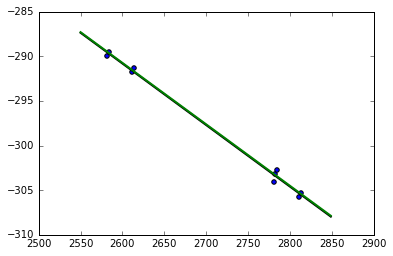

In [6]:
plt.scatter(event0['Wz'], event0['Wy'])
t = np.arange(2550, 2850, 299)
for i in tracks:
    plt.plot(t, tracks[i][0] * t + tracks[i][1], lw = 2, c = 'black')
for i in real_tracks:
    plt.plot(t, real_tracks[i][0] * t + real_tracks[i][1], lw = 2, c = 'green')
print "number of recognised tracks: " + str(len(tracks))
print "number of real tracks: " + str(len(real_tracks))

In [7]:
tracks

{1: array([ -6.88790514e-02,  -1.11729524e+02])}

In [8]:
real_tracks

{2.0: array([ -6.87848458e-02,  -1.11899816e+02])}